In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from pathlib import Path
import shutil
import zipfile
import pandas as pd

## Data import and processing

### function to read a zipfile and convert to an array of dataframes

In [8]:
def zip_read(folder, desired_date):
    df_list = []
    name_list = []
    with zipfile.ZipFile(folder) as zf:
        #desired_date = '06-Jun-2024'
        txt_files = zf.namelist()
        #txt_files = [info.filename for info in zf.infolist() if info.filename.endswith('.txt')]
        filtered_files = [k for k in txt_files if desired_date in k]
        name_list = filtered_files
        # Iterate over each text file
        #print(zf.filename)
        for filenames in filtered_files:
        # Open the text file
            with zf.open(filenames) as file:
                #dataframes.append([])
                # Read the file content into a pandas DataFrame
                df = pd.read_csv(file, encoding='latin-1', usecols=[0,1], skiprows=2) # this depends highly in the data we are dealing with
                new_column_names = df.iloc[1] 
                df.columns = new_column_names 
                df_list.append(df)
    return df_list, name_list

# functions of the plots

In [9]:
def ampMaxDependent(f, threshold):
    for k in range(len(f)):
        plt.figure(figsize=[10,7]) #figsize=[10,7])
        for i in range(0, len(f[k])):
            if sum(Y[k][i]) >= threshold:
                #plt.text(0.9, 0.9, 'text', fontsize=5, transform=plt.gcf().transFigure)
                plt.subplot(2,3,k+1)
                plt.title('plot of:'+ file_names[k][i]+" greater than %i mV" % threshold)
                plt.plot(X[k][i],Y[k][i], 'o', markersize=1.5)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
            
                plt.subplot(2,3,k+1)
                plt.title('amplitude hist')
                plt.hist(Y[k][i], bins = 100)
                plt.xlabel('amplitude (mV)')
                plt.ylabel('events')

            plt.tight_layout()
        plt.show()
                
def ampMinDependent(f, threshold):
    for k in range(len(f)):
        plt.figure(figsize=[10,7])
        for i in range(len(f[k])):
            if sum(Y[k][i]) <= threshold:
                plt.subplot(len(f),2,k+1)
                plt.title('plot of:'+file_names[k][i]+" lower than %i mV" % threshold)
                plt.plot(X[k][i],Y[k][i], 'o', markersize=1.5)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
            
                plt.subplot(len(f),2,k+1)
                plt.title('amplitude hist')
                plt.hist(Y[k][i], bins = 100)
                plt.xlabel('amplitude (mV)')
                plt.ylabel('events')

            plt.tight_layout()
        plt.show()

def histOfAmpMax(f):
    maxY = []
    plt.figure()
    for k in range(len(f)):
        maxY.append(np.zeros(len(f[k])))
        for i in range(len(f[k])):
            maxY[k][i] = max(Y[k][i])
        plt.subplot(len(f),1,k+1)
        plt.title('amplitude max value histogram (ch.%i)' % k)
        plt.hist(maxY[k], bins=50)
        plt.xlabel('amplitude (mV)')
        plt.ylabel('events')
    
        plt.tight_layout()
    plt.show()

def histOfAmpMin(f):
    minY = []
    plt.figure()
    for k in range(len(f)):
        minY.append(np.zeros(len(f[k])))
        for i in range(0, len(f[k])):
            minY[k][i] = min(Y[k][i])
        plt.subplot(len(f),1,k+1)
        plt.title('amplitude min value histogram (ch.%i)' % k)
        plt.hist(minY[k], bins=50)
        plt.xlabel('amplitude (mV)')
        plt.ylabel('events')
    
        plt.tight_layout()
    plt.show()
    
def waveformFilter(f, threshold):
    filtered_events = []
    k = 2
    for event in range(0, len(f[k])):
        if min(Y[k][event]) <= threshold:
            filtered_events.append(event)
    return filtered_events

def waveformPlot(f, events):
    k = 2
    for event in events:
        print('event n = %i' % event)
        plt.figure(figsize=[15,7])
        
        plt.subplot(3,1,1)
        plt.title('plot of: C_%i_%s' % (k-1, file_names[k-2][event]))
        plt.plot(X[k-2][event],Y[k-2][event], 'o', markersize=1)
        plt.xlabel('time (ns)')
        plt.ylabel('voltage (mV)')
        
        plt.subplot(3,1,2)
        plt.title('plot of: C_%i_%s' % (k, file_names[k-1][event]))
        plt.plot(X[k-1][event],Y[k-1][event], 'o', markersize=1)
        plt.xlabel('time (ns)')
        plt.ylabel('voltage (mV)')
        
        plt.subplot(3,1,3)
        plt.title('plot of: C_%i_%s' % (k+1, file_names[k][event]))
        plt.plot(X[k][event],Y[k][event], 'o', markersize=1)
        plt.xlabel('time (ns)')
        plt.ylabel('voltage (mV)')

        plt.tight_layout()
        plt.show()

def individualWaveform_FEA(f, threshold):
    for k in range(len(f)):
        for event in range(0, len(f[k])):
            if max(Y[0][event]) >= threshold:
                print('event n = %i' % event)
                plt.figure(figsize=[15,7])
                
                plt.subplot(3,1,1)
                plt.title('plot of: C_%i_%s' % (1, file_names[0][event]))
                plt.plot(X[0][event],Y[0][event], 'o', markersize=1)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
                
                plt.subplot(3,1,2)
                plt.title('plot of: C_%i_%s' % (2, file_names[1][event]))
                plt.plot(X[1][event],Y[1][event], 'o', markersize=1)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
                
                plt.subplot(3,1,3)
                plt.title('plot of: C_%i_%s' % (3, file_names[2][event]))
                plt.plot(X[2][event],Y[2][event], 'o', markersize=1)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
            elif max(Y[1][event]) >= threshold:
                print('event n = %i' % event)
                plt.figure(figsize=[15,7])
                
                plt.subplot(3,1,1)
                plt.title('plot of: C_%i_%s' % (1, file_names[0][event]))
                plt.plot(X[0][event],Y[0][event], 'o', markersize=1)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
                
                plt.subplot(3,1,2)
                plt.title('plot of: C_%i_%s' % (2, file_names[1][event]))
                plt.plot(X[1][event],Y[1][event], 'o', markersize=1)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
                
                plt.subplot(3,1,3)
                plt.title('plot of: C_%i_%s' % (3, file_names[2][event]))
                plt.plot(X[2][event],Y[2][event], 'o', markersize=1)
                plt.xlabel('time (ns)')
                plt.ylabel('voltage (mV)')
                

                plt.tight_layout()
                plt.show()

# 240531-240603

In [ ]:
# Linux path
folder1 = '/home/caio/data/241119_4FEA_LXe/afterLXe/datascopeZip.zip'
folder2 = '/home/caio/data-makeup/kamioka-data/FEA_test_0036-0038/scope-waveRunner8000/C2_waveform_trig-pmt_240531-240603.zip'
folder3 = '/home/caio/data-makeup/kamioka-data/FEA_test_0036-0038/scope-waveRunner8000/C3_waveform_trig-pmt_240531-240603.zip'

In [11]:
folder_list = [folder1, folder2, folder3]

dataframes = []
file_names = []

date_tobe_inspected = '2024-06-01'

for folder in folder_list:
    df_list, name_list = zip_read(folder, date_tobe_inspected)
    dataframes.append(df_list)
    file_names.append(name_list)

FileNotFoundError: [Errno 2] No such file or directory: '/home/caio/data-makeup/kamioka-data/FEA_test_0036-0038/scope-waveRunner8000/C1_waveform_trig-pmt_240531-240603.zip'

# operation with data

In [6]:
def dataProcessing(dataframes):
    X = []
    Y = []
    sumY = []
    for n in range(len(dataframes)):
        X.append({})
        Y.append({})
        sumY.append(np.zeros(len(dataframes[n])))
        for m in range(0, len(dataframes[n])): 
            x = dataframes[n][m].iloc[2:, 0].astype(float)
            y = dataframes[n][m].iloc[2:, 1].astype(float)
            X[n][m] = x*1e9
            Y[n][m] = y*1e3
            sumY[n][m] = sum(Y[n][m])
            

    return X, Y, sumY

In [7]:
X, Y, sumY = dataProcessing(dataframes)

# Plots

## Individual waveform plot

In [13]:
# Individual waveform plot
#print(len(file_name1))
individualWaveform_FEA(dataframes, 200) 

event n = 0


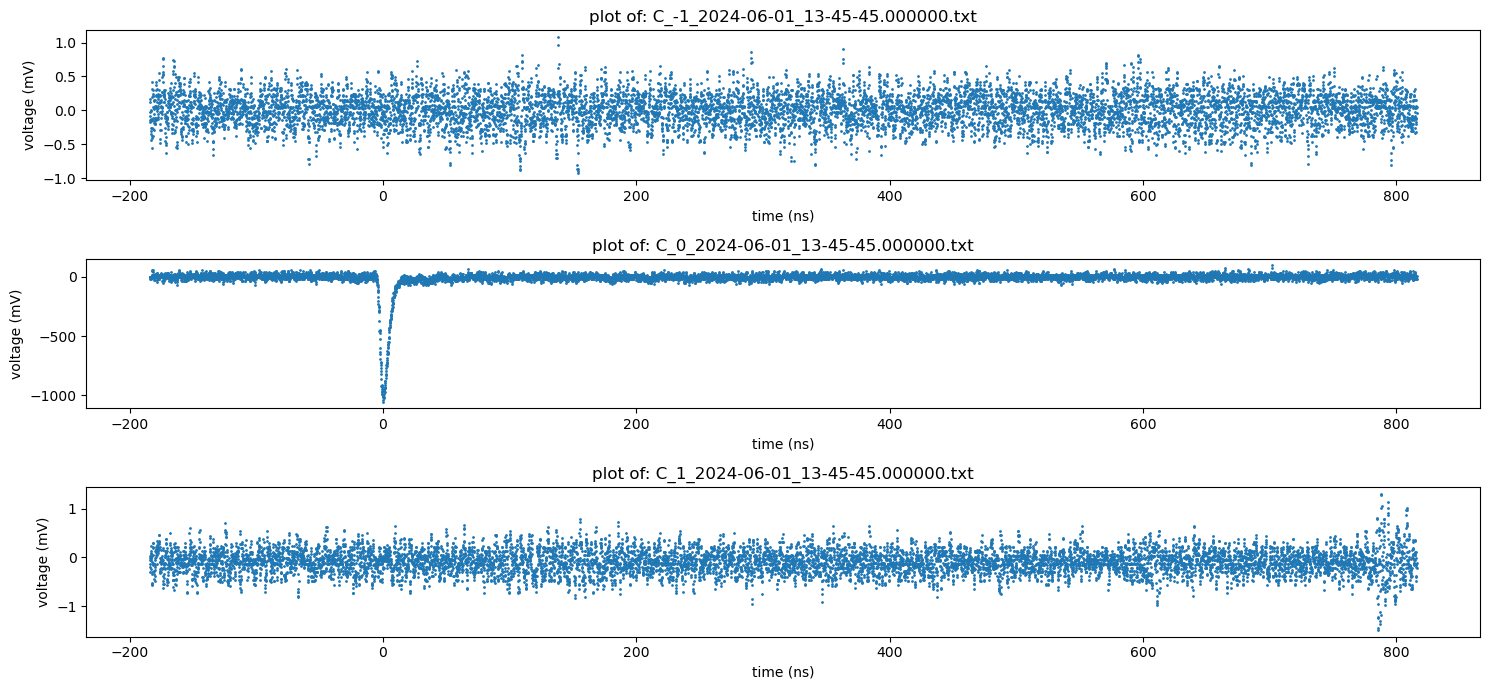

event n = 1


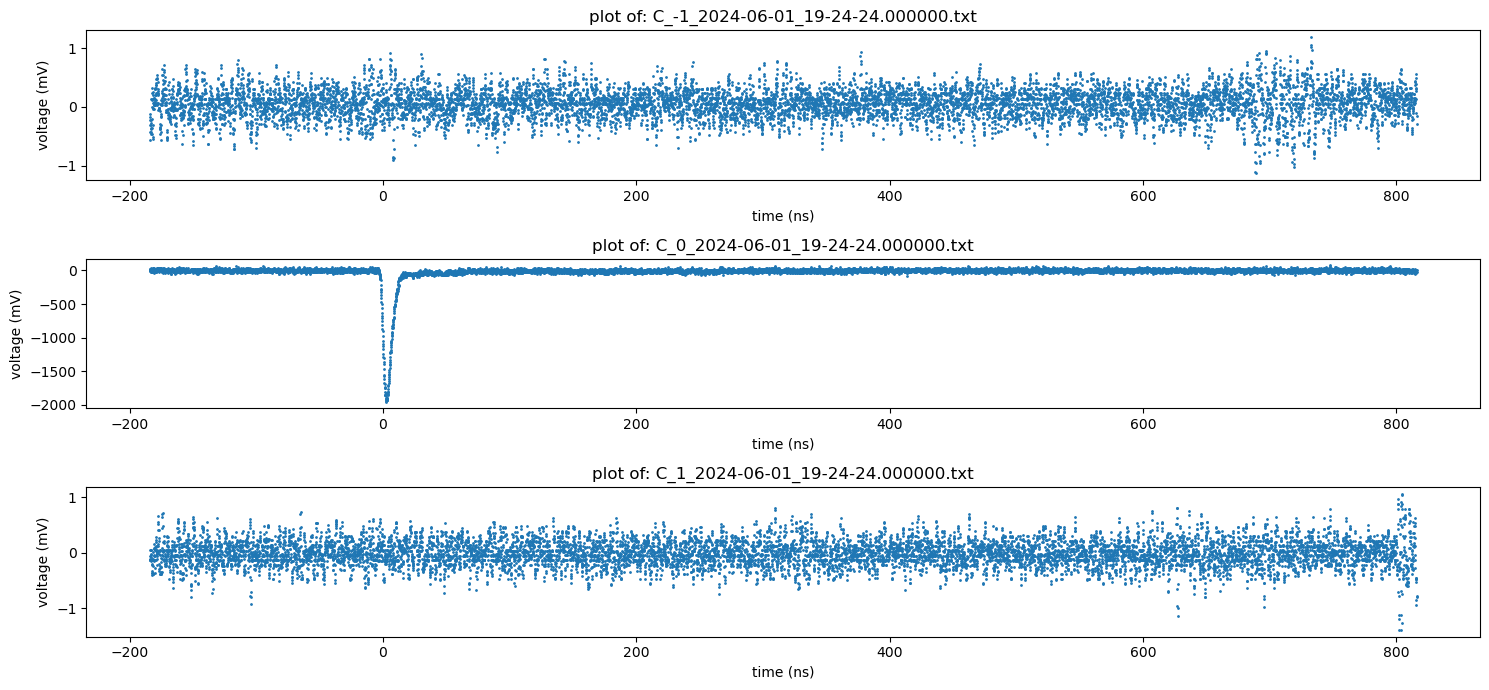

event n = 2


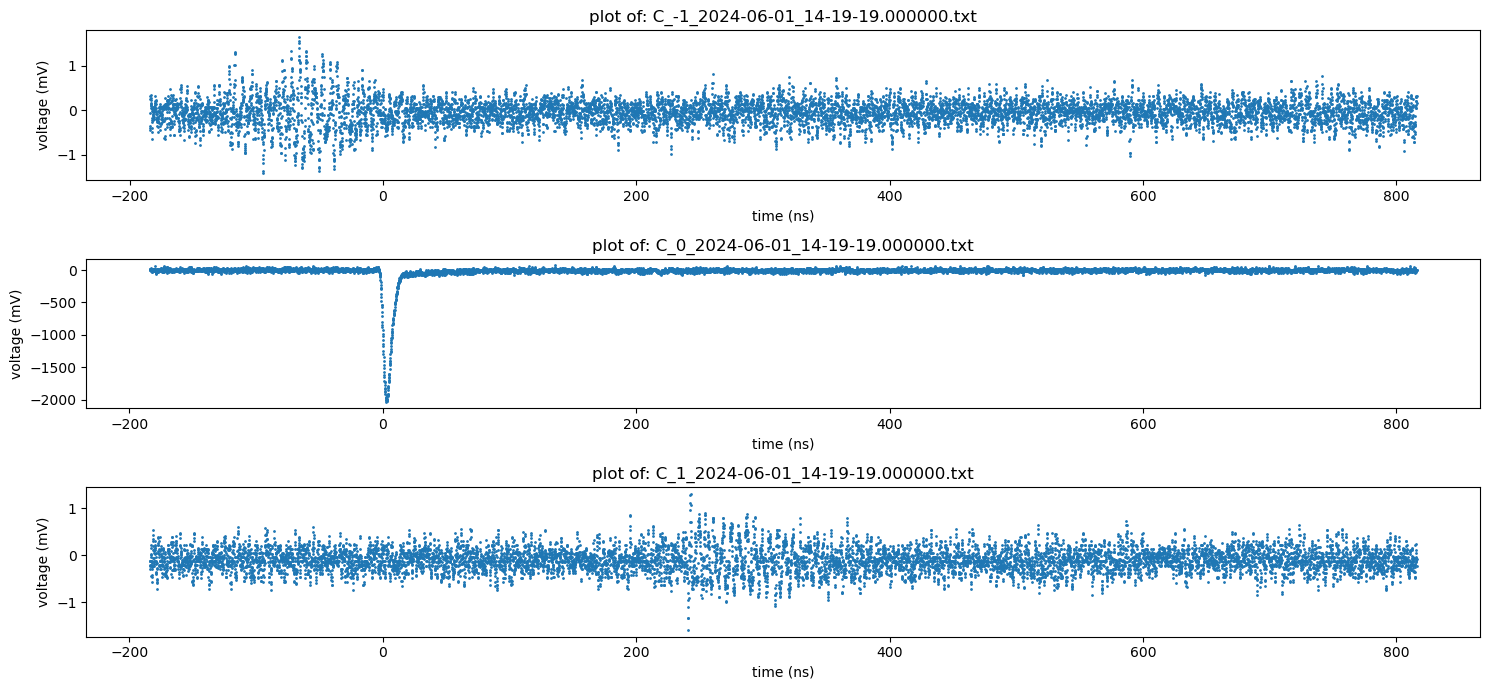

event n = 3


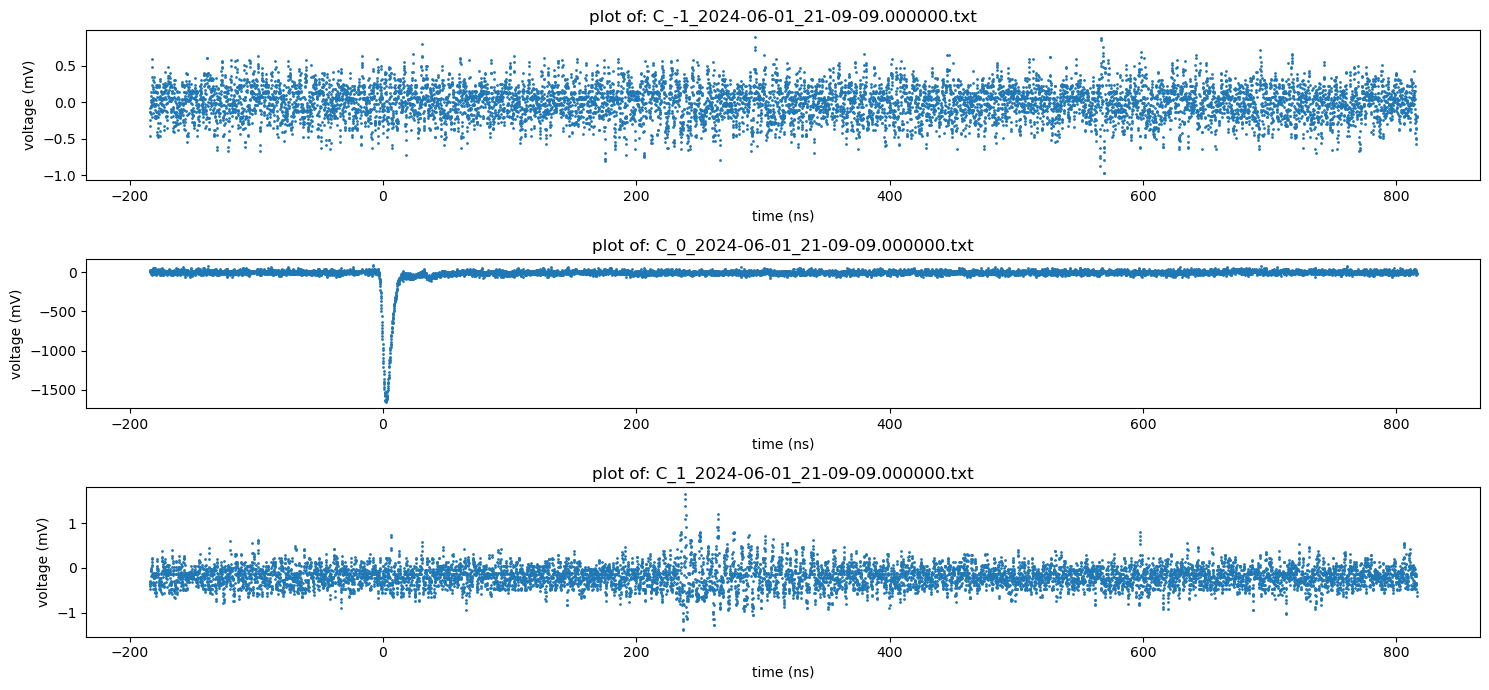

event n = 4


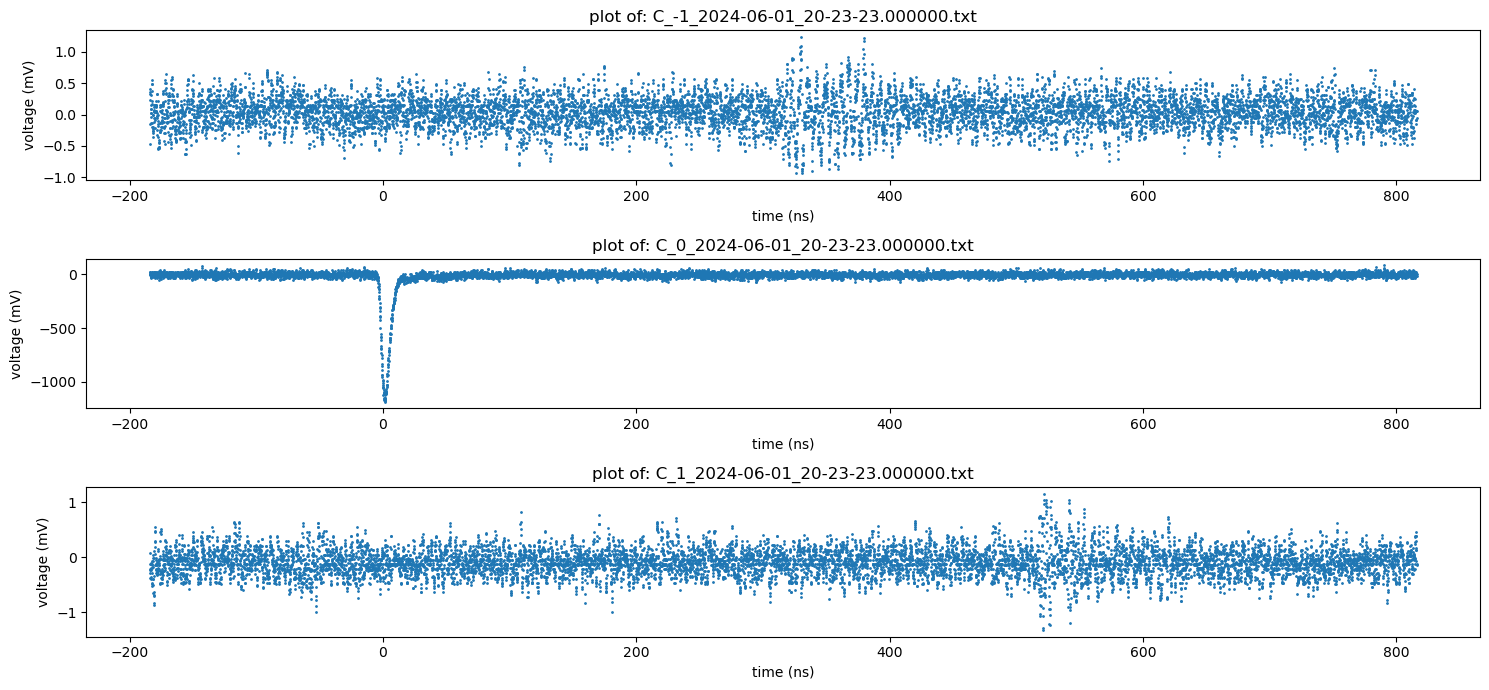

event n = 5


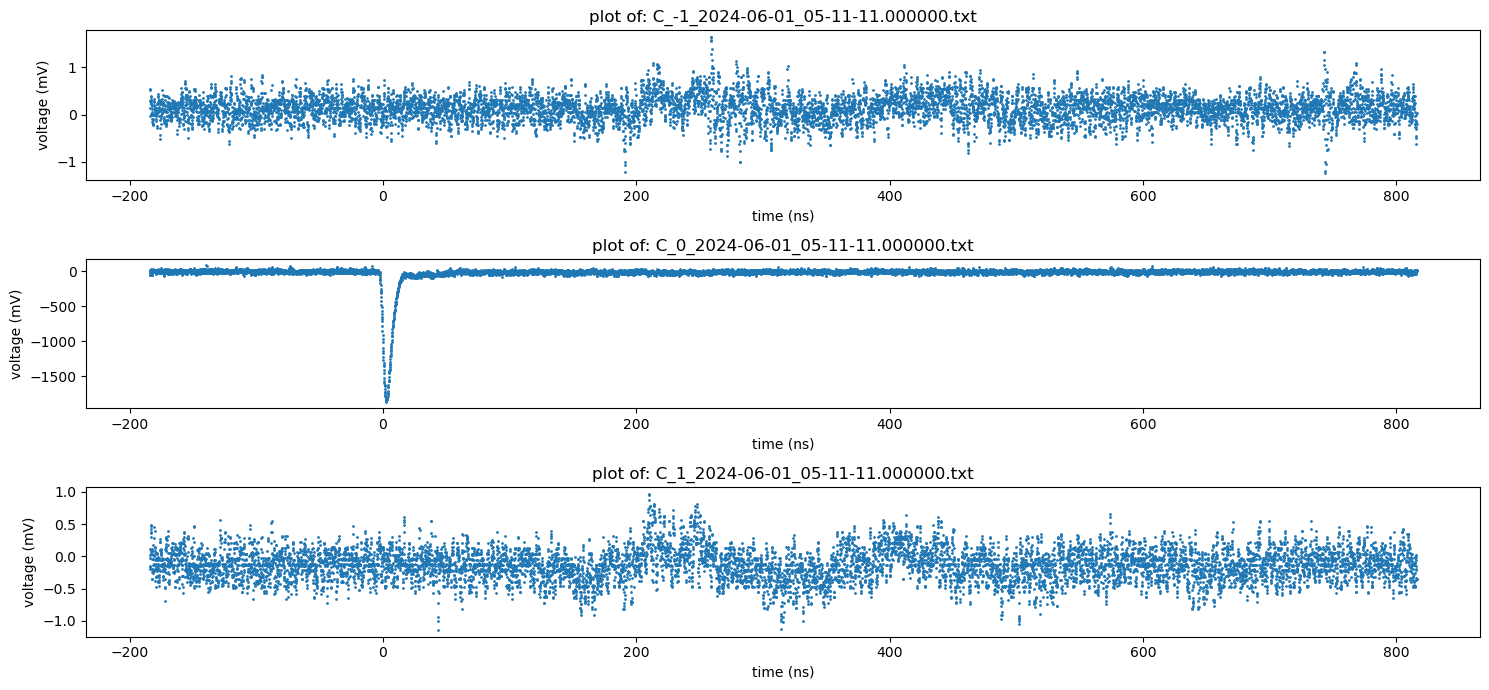

event n = 6


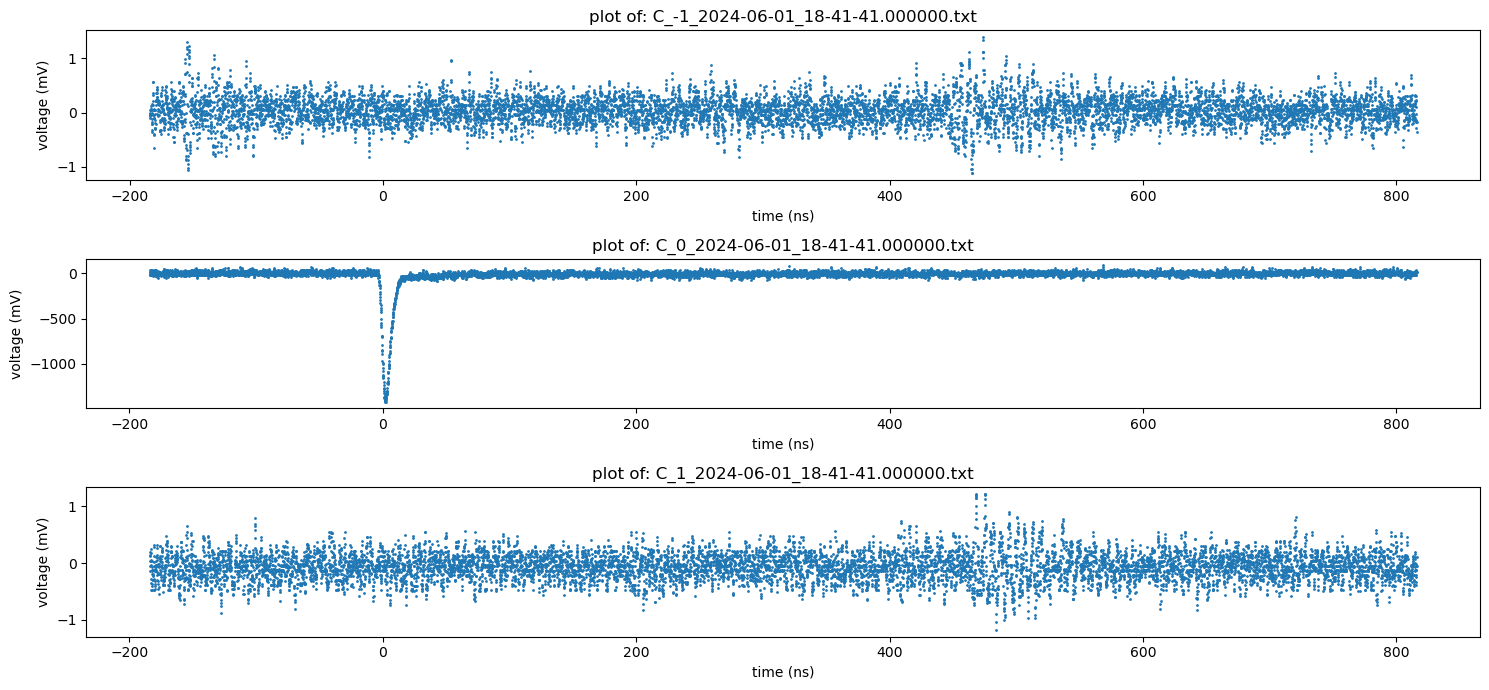

event n = 7


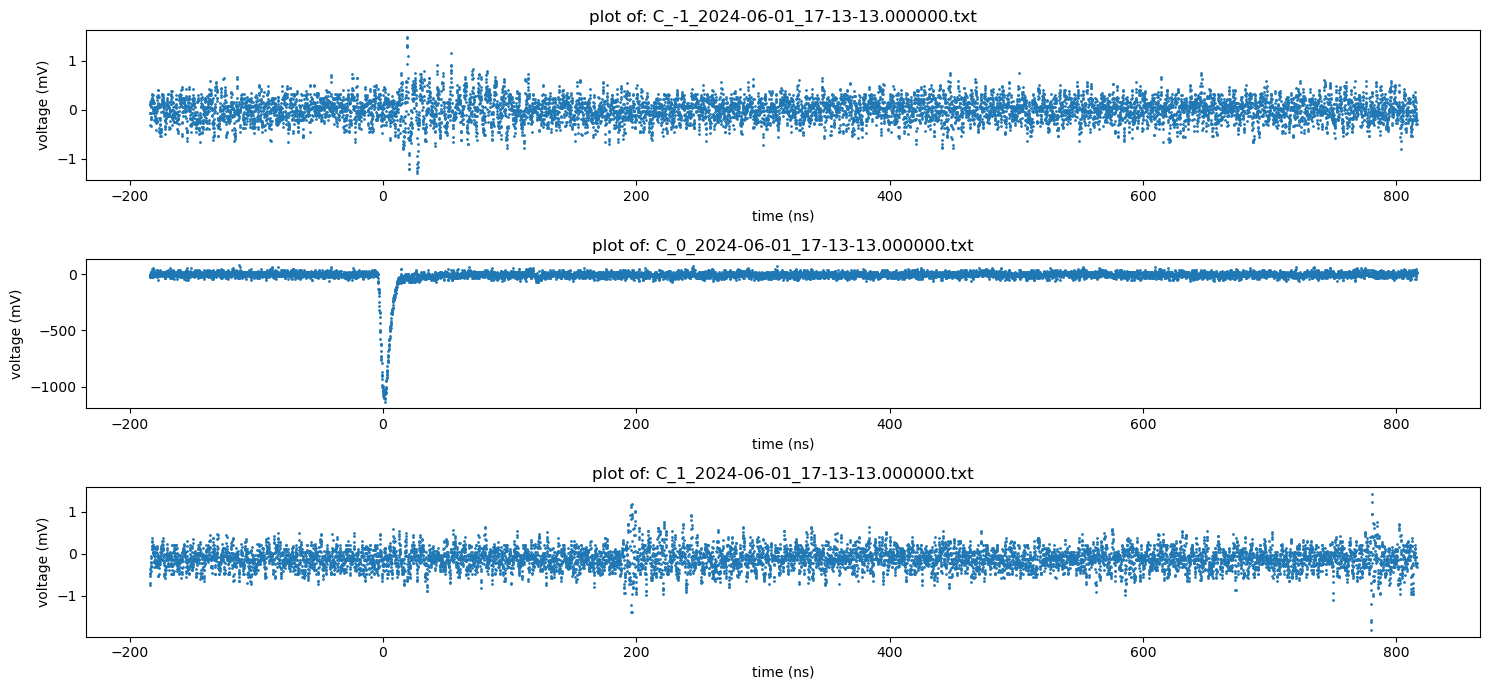

event n = 8


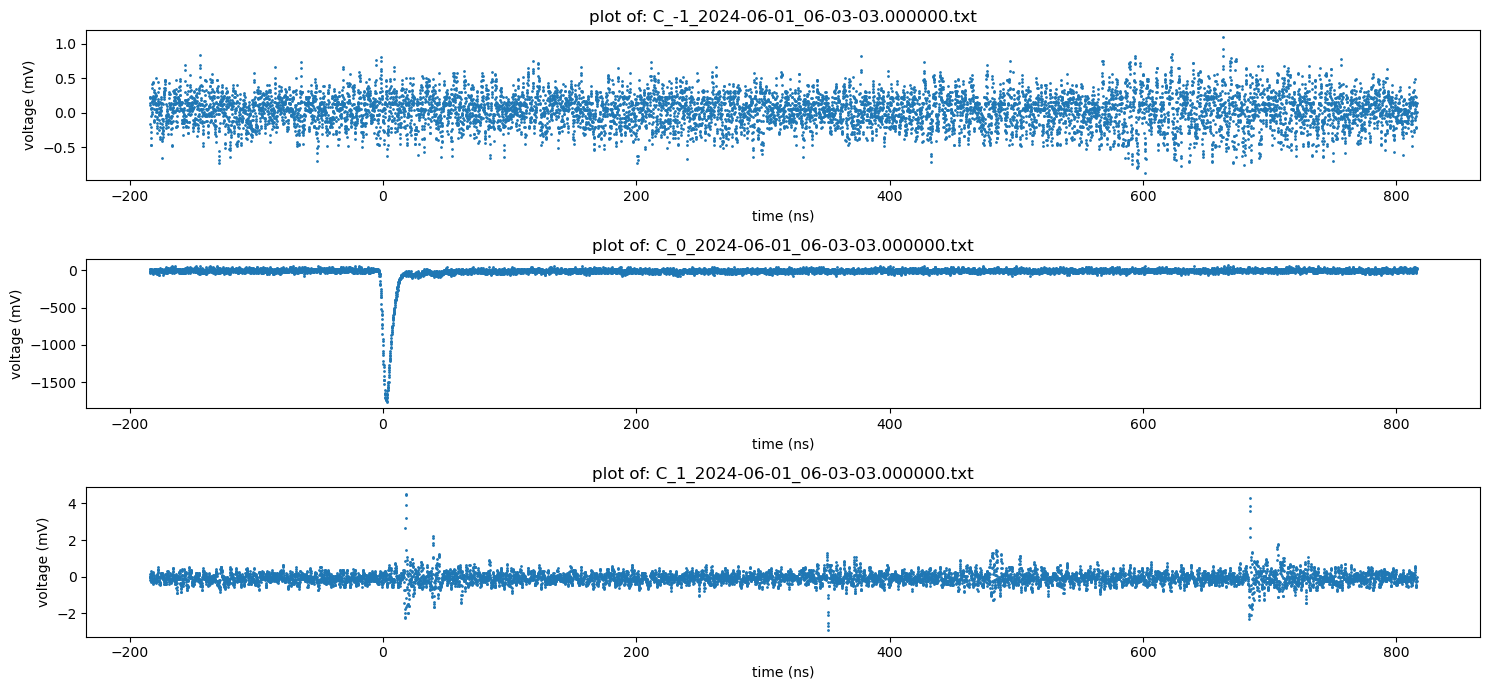

event n = 9


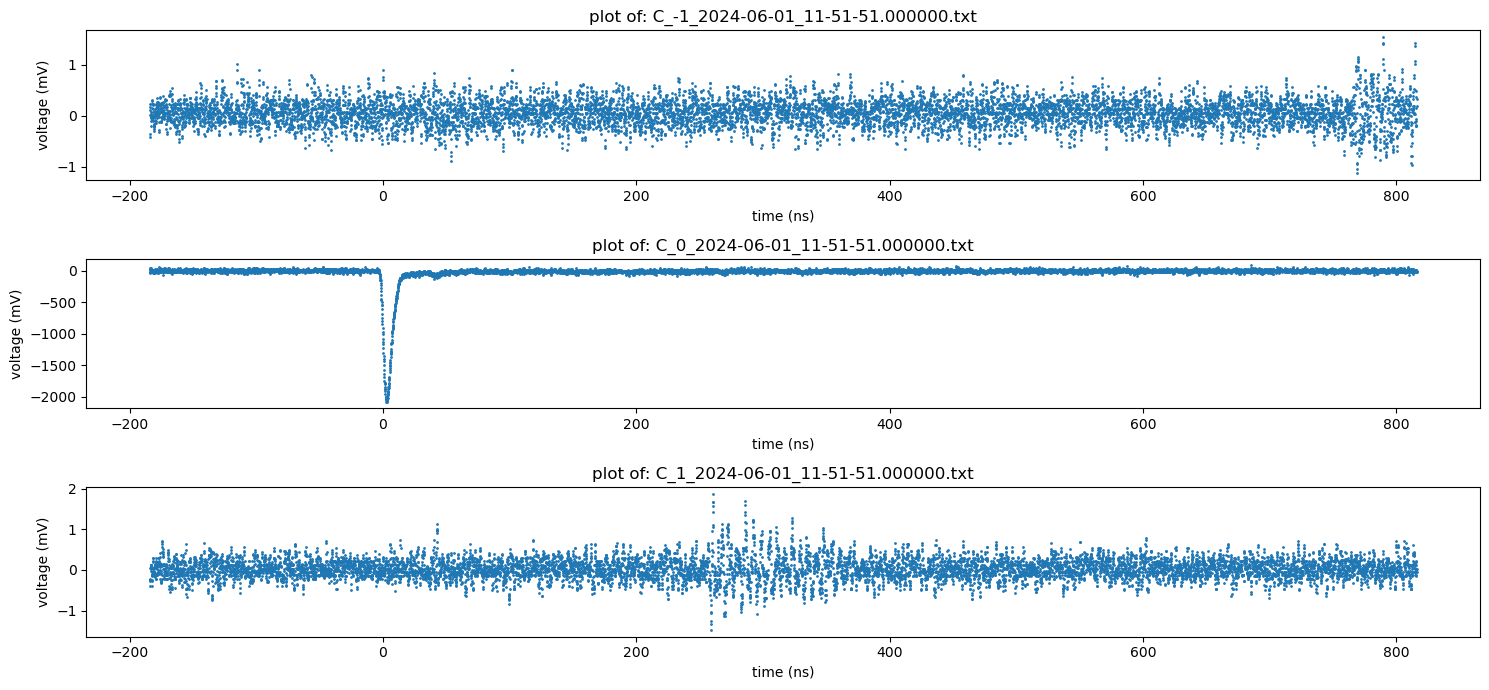

event n = 10


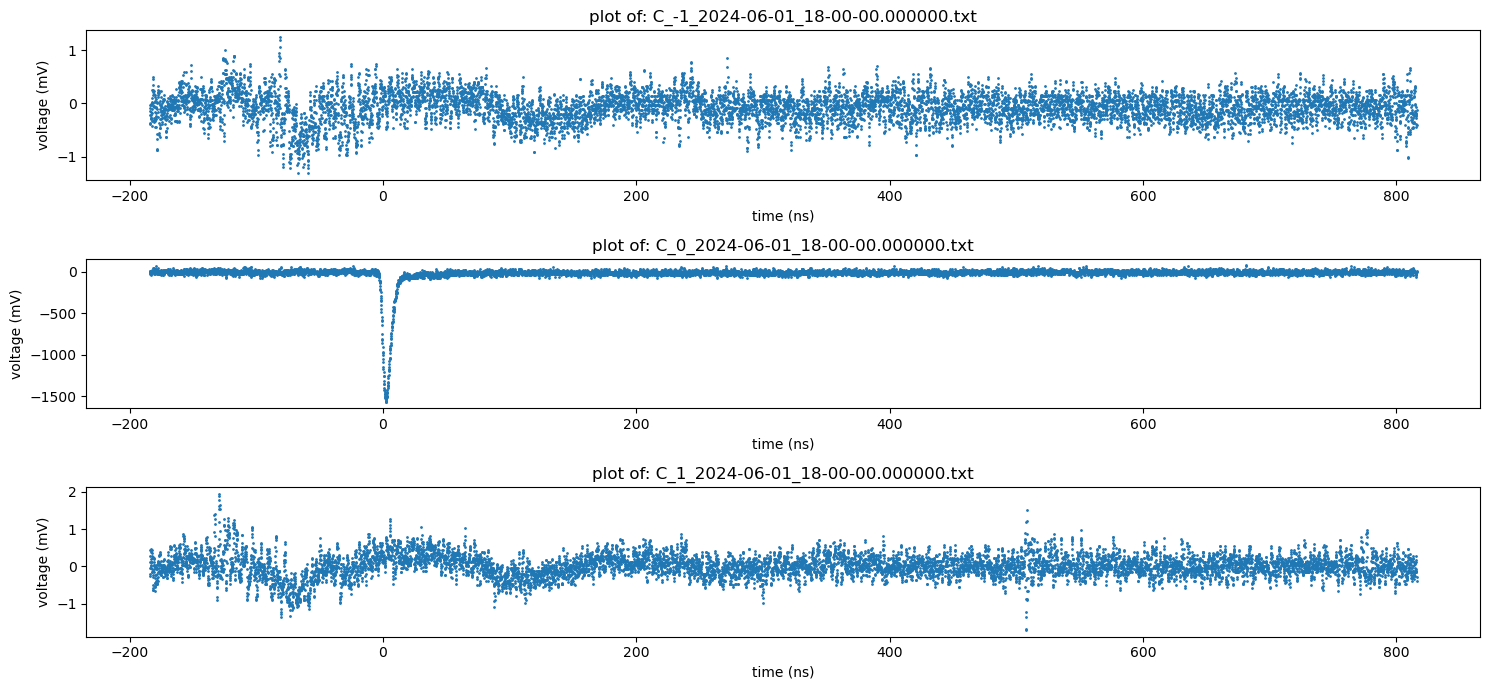

event n = 11


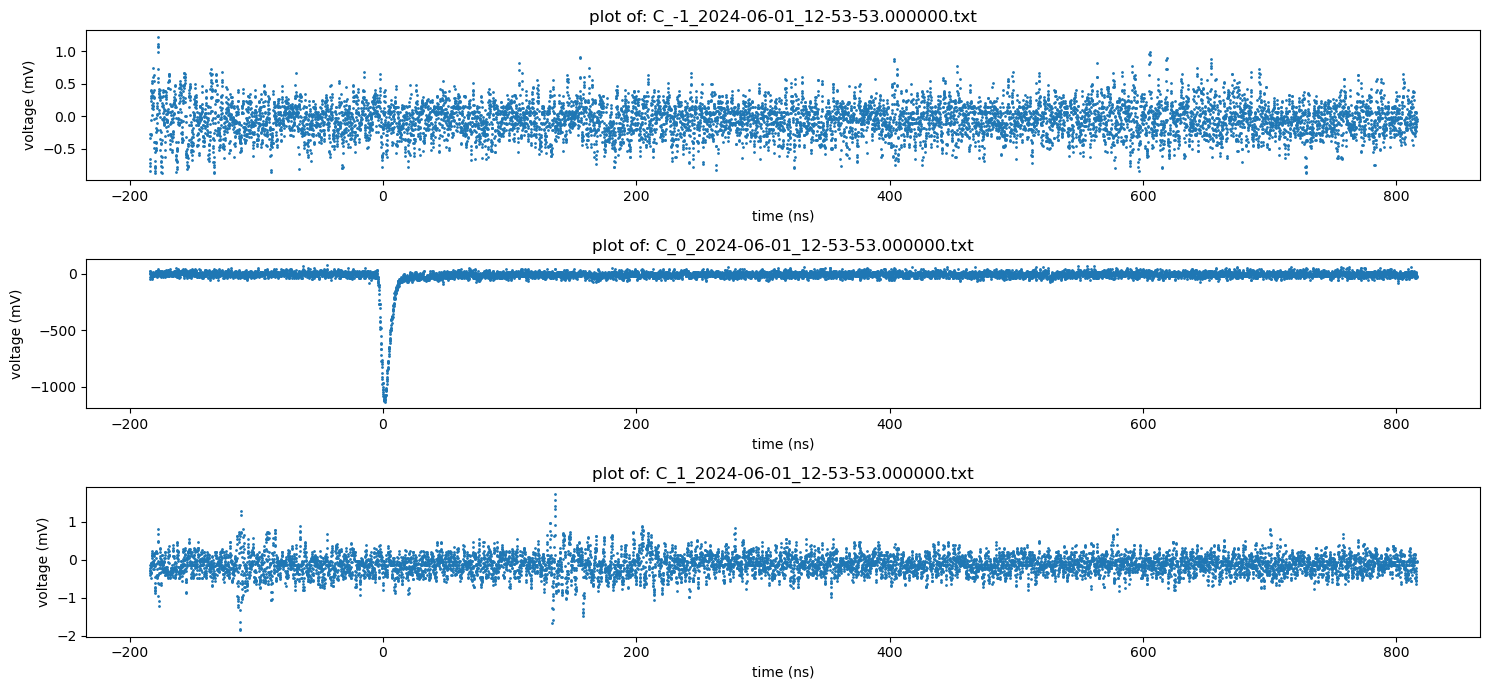

event n = 12


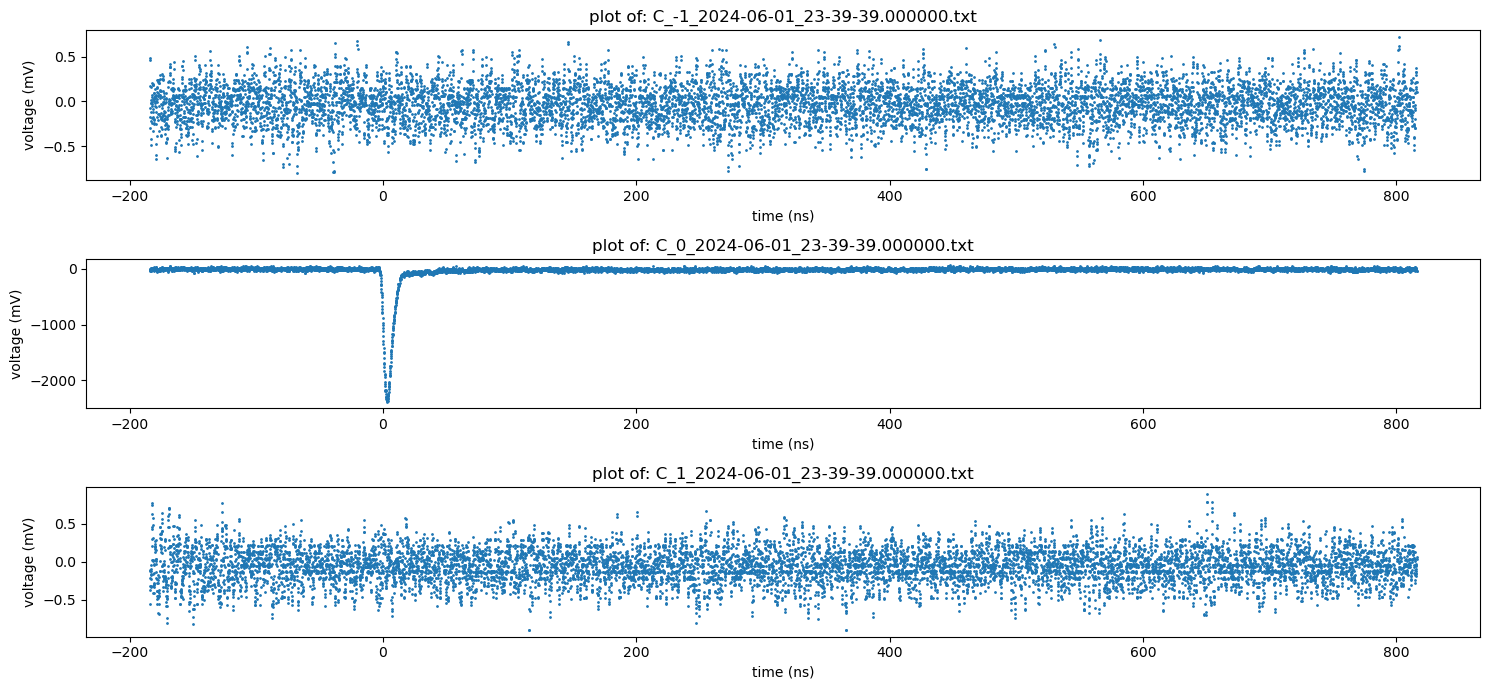

event n = 13


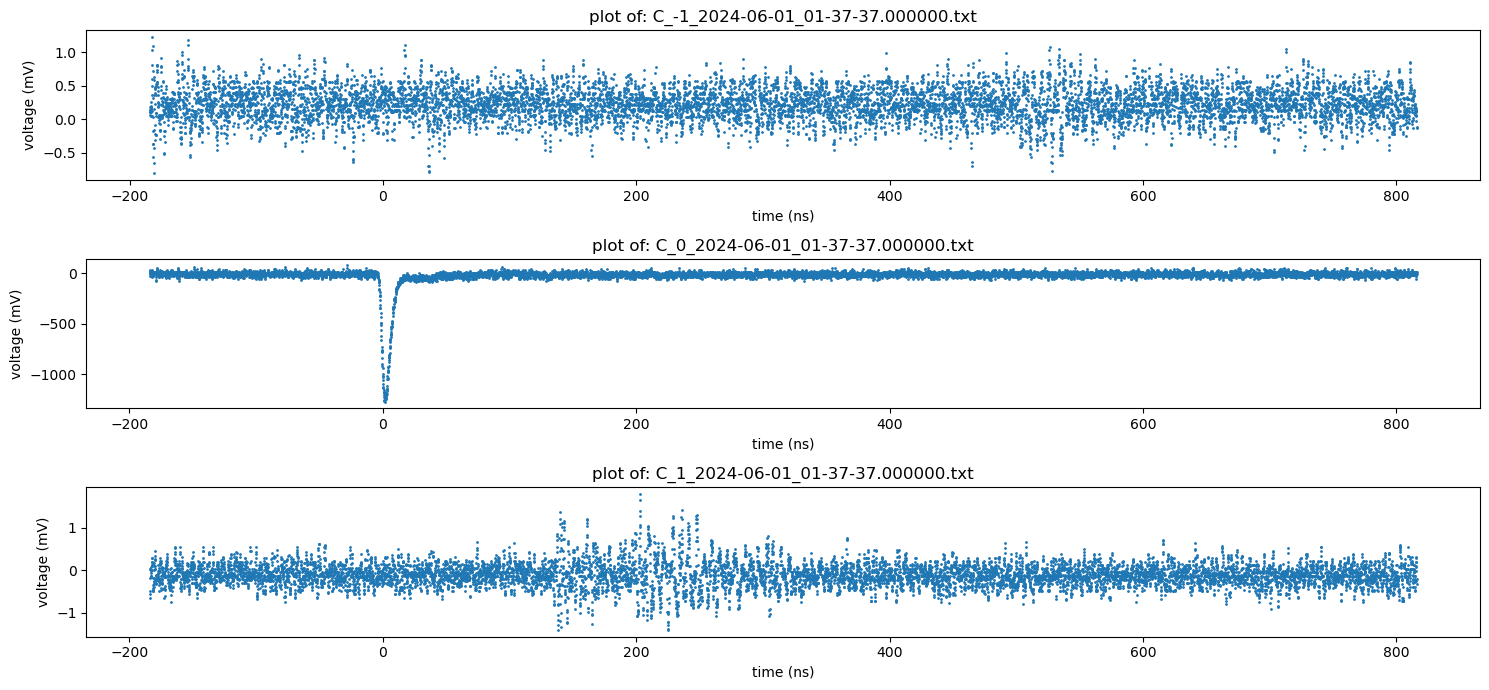

event n = 14


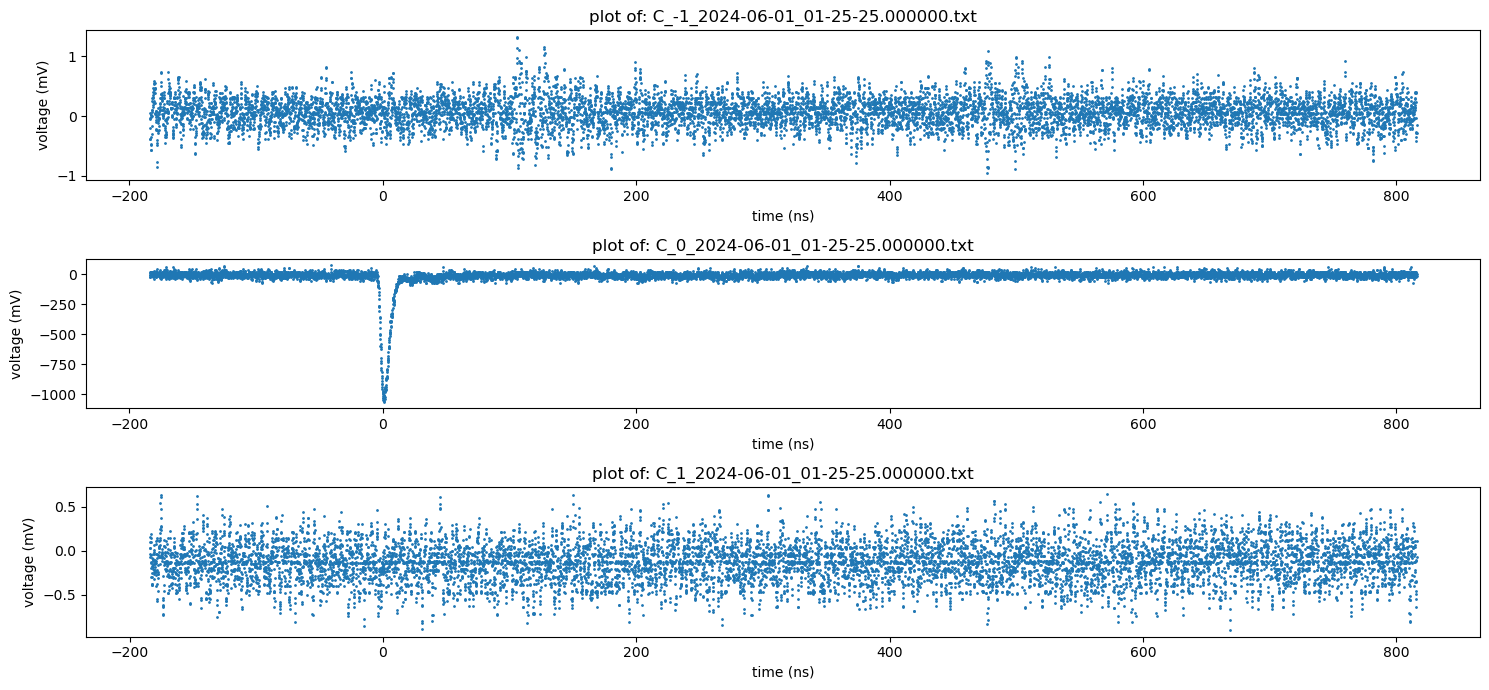

event n = 15


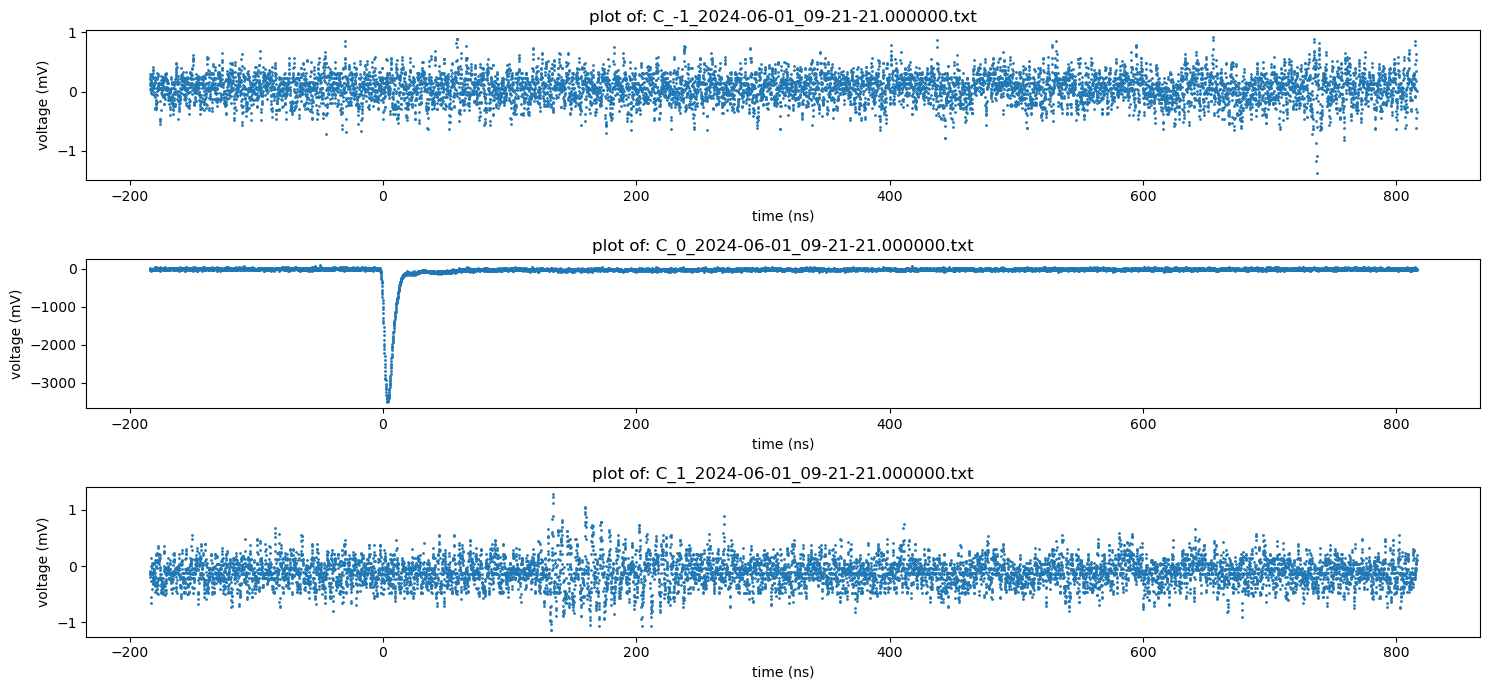

event n = 16


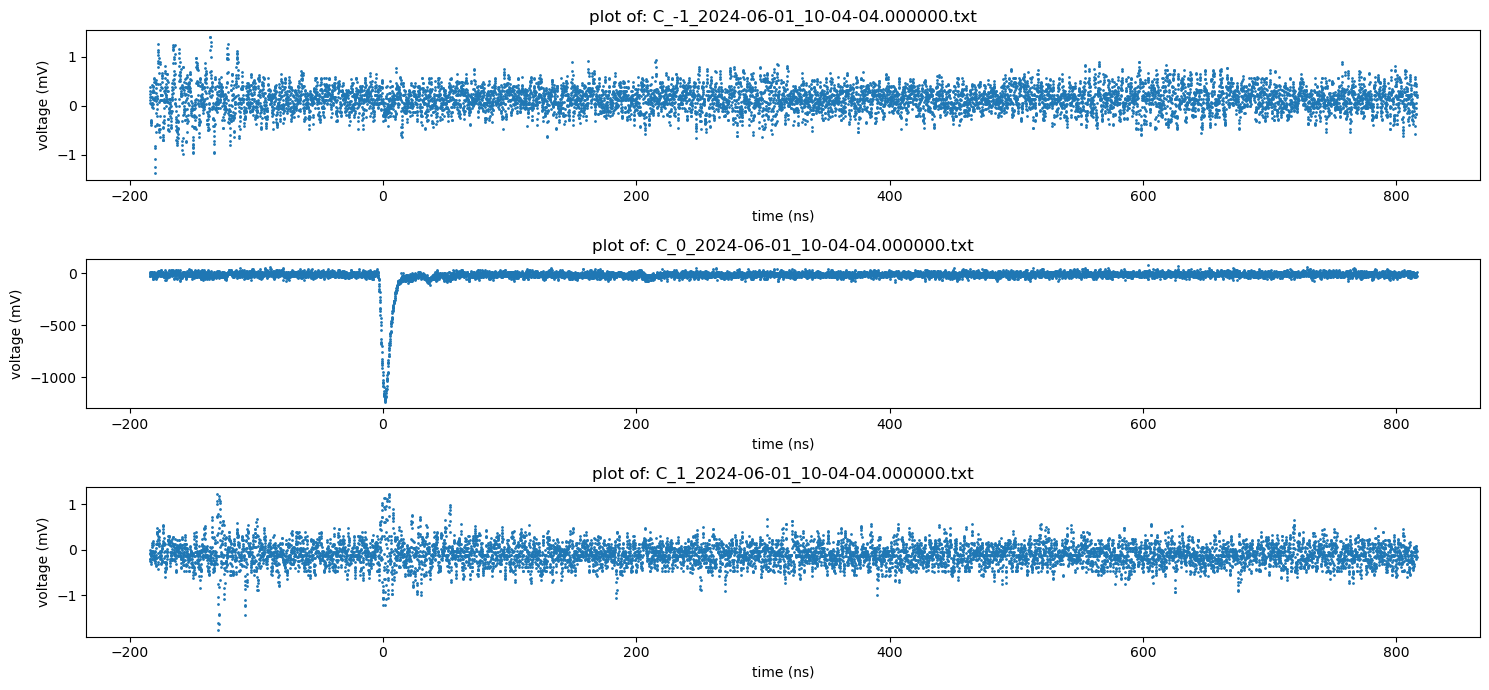

event n = 17


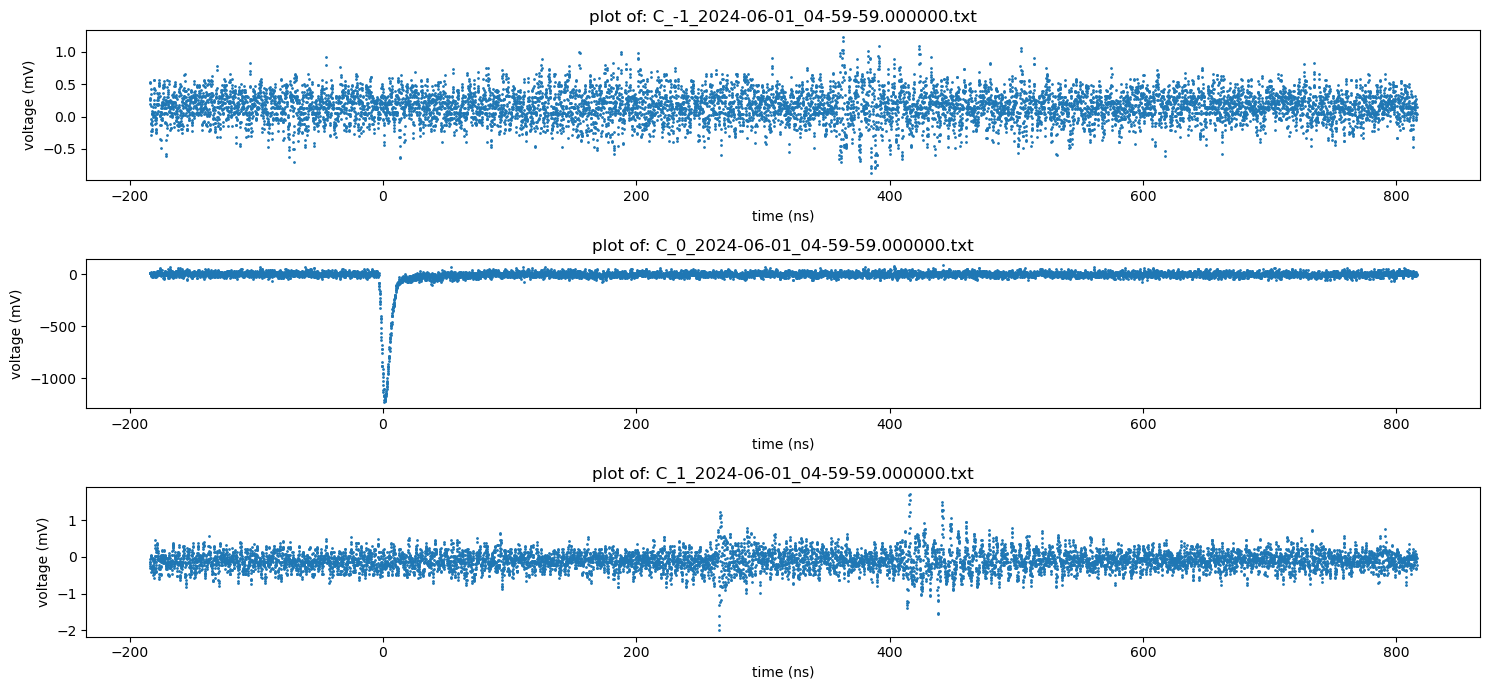

event n = 18


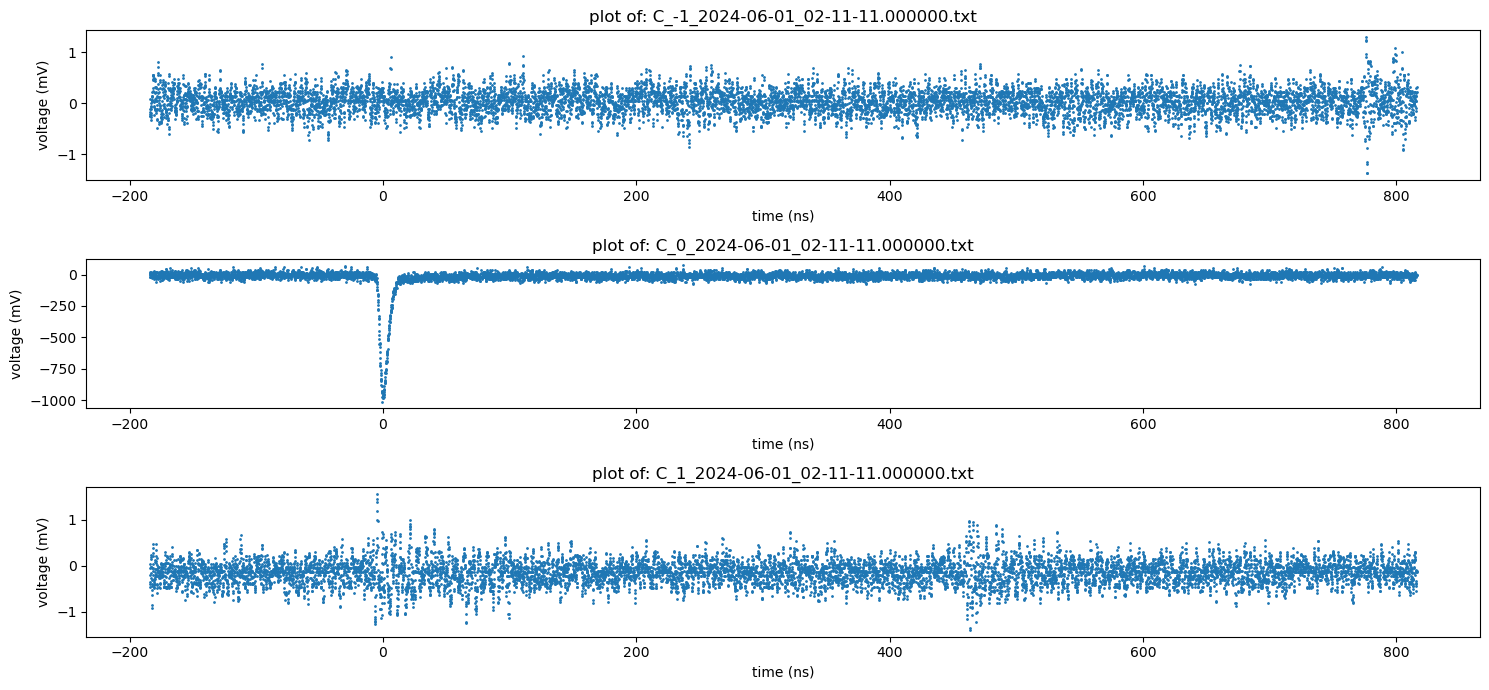

event n = 19


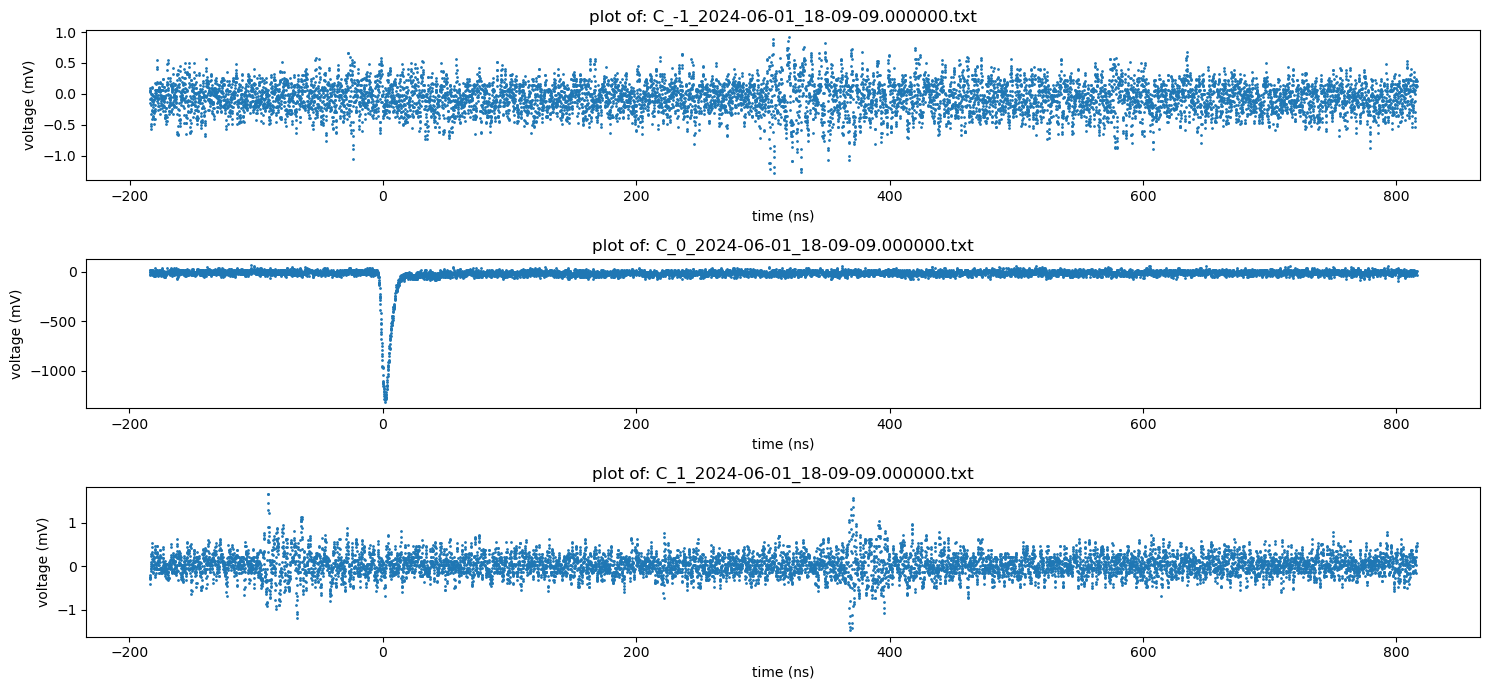

event n = 20


KeyboardInterrupt: 

In [17]:
filtered_events = waveformFilter(dataframes, -3000)

waveformPlot(dataframes, filtered_events)

## sum of outputs

to cut the reflections

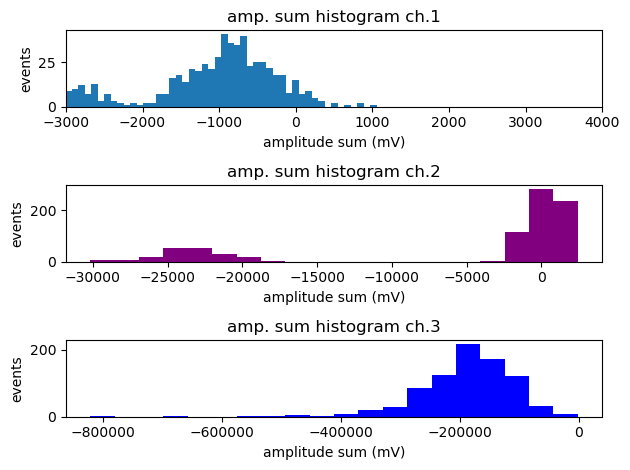

In [9]:
plt.figure()
plt.subplot(3,1,1)
plt.title('amp. sum histogram ch.1')
plt.hist(sumY[0], bins=200)
plt.xlim([-3000, 4000])
plt.xlabel('amplitude sum (mV)')
plt.ylabel('events')
#plt.ylim([0,50])

plt.subplot(3,1,2)
plt.title('amp. sum histogram ch.2')
plt.hist(sumY[1], bins=20, color='purple')
plt.xlabel('amplitude sum (mV)')
plt.ylabel('events')
#plt.ylim([0,50])

plt.subplot(3,1,3)
plt.title('amp. sum histogram ch.3')
plt.hist(sumY[2], bins=20, color='blue')
plt.xlabel('amplitude sum (mV)')
plt.ylabel('events')

plt.tight_layout()
plt.show()

## maximum and mininum distribution

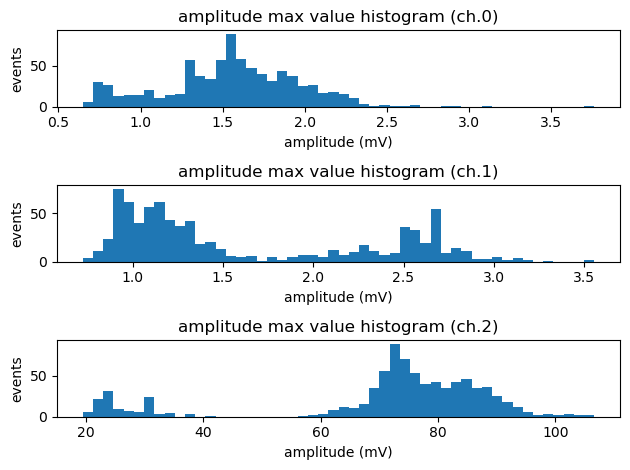

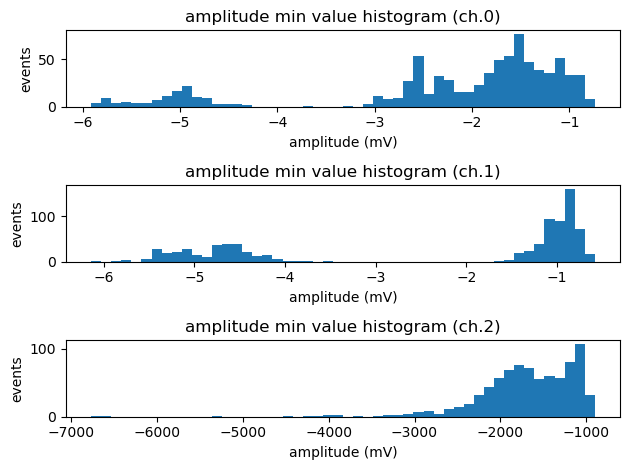

In [10]:


histOfAmpMax(dataframes)
histOfAmpMin(dataframes)


## plots of the waveforms depending on the threshold

In [11]:
# gthanthreshold = 100000
# lthanthreshold = -100000
# ampMaxDependent(dataframes,gthanthreshold)
# ampMinDependent(dataframes,lthanthreshold)



# find peak and calculate its area

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, argrelmax, peak_widths

## learn how scipy works

In [ ]:
# using scipy to get the peaks

threshold = 2000
f = dataframes
peaks = []
event = 9

df = pd.DataFrame(dataframes[2][event])

peak, _ = find_peaks(df.iloc[2:, 1].astype(float)*-1e3, height = 500)
x = df.iloc[2:, 1].astype(float)*-1e3
#x_line = np.full_like(x, 50)

plt.figure()
plt.plot(x)
plt.axvline(400, ls = "--", color = 'red')
plt.axvline(800, ls = "--", color = 'red')
plt.plot(peak+2, x[peak+2], "xr"); plt.legend(['height'])
#plt.xlim([0, 1000])
plt.xlabel('index')
plt.ylabel('mV')

# for event in range(0, len(f[2])):
#     if max(Y[2][event]) >= threshold:
#         peak, _ = find_peaks(Y[2][event], prominence=1)
#         x = dataframes[2][event].iloc[2:,0].astype(float)*1e9
#         plt.figure()
#         plt.plot(x)
#         plt.plot(peak, x[peak], "xr"); plt.legend(['prominence'])

In [ ]:
result = peak_widths(x, peak, rel_height=0.5)

In [ ]:
plt.plot(x)
plt.plot(peak, x[peak], "x")
plt.hlines(*result[1:], color="C2")

In [ ]:
max = argrelmax(x.values, axis=0)

In [ ]:
plt.plot(max+2, x[max+2], "xr"); plt.legend(['height'])

In [ ]:
print(x[500])

In [ ]:
# pulse area

# threshold = 50
# area = 0

# for n in range(len(x)):
#     if x.iloc[n].astype(float) >= threshold:
#         area += x.iloc[n].astype(float)

from_time = 400
to_time = 800

area = 0

for n in range(400, 800):
    area += x[n]


print(area)

# 240605-240611

In [12]:
print(max(Y[2]))

825


In [13]:
# Linux path
folder1 = '/home/caio/data-makeup/kamioka-data/FEA_test_0036-0038/scope-waveRunner8000/C1_waveformTrigpmt_240605-240611.zip'
folder2 = '/home/caio/data-makeup/kamioka-data/FEA_test_0036-0038/scope-waveRunner8000/C2_waveformTrigpmt_240605-240611.zip'
folder3 = '/home/caio/data-makeup/kamioka-data/FEA_test_0036-0038/scope-waveRunner8000/C3_waveformTrigpmt_240605-240611.zip'

In [7]:
# Windows path
folder1 = "D:\\data\\kamioka-data\\FEA_test_0036-0038_2404-\\scope-waveRunner8000\\C1_waveform_trigpmt.zip"
folder2 ="D:\\data\\kamioka-data\\FEA_test_0036-0038_2404-\\scope-waveRunner8000\\C2_waveform_trigpmt.zip"
folder3 ="D:\\data\\kamioka-data\\FEA_test_0036-0038_2404-\\scope-waveRunner8000\\C3_waveform_trigpmt.zip"

In [14]:
folder_list = [folder1, folder2, folder3]

dataframes = []
file_names = []

date_tobe_inspected = '2024-06-06'

for folder in folder_list:
    df_list, name_list = zip_read(folder, date_tobe_inspected)
    dataframes.append(df_list)
    file_names.append(name_list)
    

#dataframes = [zip_read(folder[i], None) for i in range(len(folder))]


In [ ]:
#print(dataframes[0][:5])
print(file_names)

In [ ]:
# f=[]
# C_files=[]
# sorted_files= {}
# file_names = []


# for n in range(len(folder)):
#     directory=Path(folder[n])
#     #desired date
#     desired_date = 'Jun-*2024*.txt'

#     # filter data date we want to see
#     C_files.append([file for file in directory.glob(desired_date)])
#     sorted_files[n] = sorted(C_files[n])

#     for file_path in sorted_files[n]:
#         file_names.append(file_path.name)

#     f.append({})

#     for i in range(0, len(C_files[n])):
#         file_path1 = os.path.join(folder[n], C_files[n][i])
#         f[n][i] = np.genfromtxt(file_path1,
#                     dtype= None,delimiter=',',encoding='latin_1', usecols=(0,1)) # column0: time, column1: amplitude           

# operation with data

In [23]:
def dataProcessing(dataframes):
    X = []
    Y = []
    sumY = []
    for n in range(len(dataframes)):
        X.append({})
        Y.append({})
        sumY.append(np.zeros(len(dataframes[n])))
        for m in range(0, len(dataframes[n])): 
            x = dataframes[n][m].iloc[2:, 0].astype(float)
            y = dataframes[n][m].iloc[2:, 1].astype(float)
            X[n][m] = x*1e9
            Y[n][m] = y*1e3
            sumY[n][m] = sum(Y[n][m])
            

    return X, Y, sumY

# Plots

## Individual waveform plot

In [24]:
X, Y, sumY = dataProcessing(dataframes)

In [ ]:
# Individual waveform plot
#print(len(file_name1))
individualWaveform_FEA(dataframes, 2000) 

## sum of outputs

to cut the reflections

In [ ]:
plt.figure()
plt.subplot(3,1,1)
plt.title('amp. sum histogram ch.1')
plt.hist(sumY[0], bins=200)
plt.xlim([-3000, 4000])
plt.xlabel('amplitude sum (mV)')
plt.ylabel('events')
#plt.ylim([0,50])

plt.subplot(3,1,2)
plt.title('amp. sum histogram ch.2')
plt.hist(sumY[1], bins=20, color='purple')
plt.xlabel('amplitude sum (mV)')
plt.ylabel('events')
#plt.ylim([0,50])

plt.subplot(3,1,3)
plt.title('amp. sum histogram ch.3')
plt.hist(sumY[2], bins=20, color='blue')
plt.xlabel('amplitude sum (mV)')
plt.ylabel('events')

plt.tight_layout()
plt.show()

## maximum and mininum distribution

In [ ]:


histOfAmpMax(dataframes)
histOfAmpMin(dataframes)


## plots of the waveforms depending on the threshold

In [ ]:
gthanthreshold = 100000
lthanthreshold = -100000
ampMaxDependent(dataframes,gthanthreshold)
ampMinDependent(dataframes,lthanthreshold)



# find peak and calculate its area

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, argrelmax, peak_widths

## learn how scipy works

In [ ]:
# using scipy to get the peaks

threshold = 2000
f = dataframes
peaks = []
event = 9

df = pd.DataFrame(dataframes[2][event])

peak, _ = find_peaks(df.iloc[2:, 1].astype(float)*-1e3, height = 500)
x = df.iloc[2:, 1].astype(float)*-1e3
#x_line = np.full_like(x, 50)

plt.figure()
plt.plot(x)
plt.axvline(400, ls = "--", color = 'red')
plt.axvline(800, ls = "--", color = 'red')
plt.plot(peak+2, x[peak+2], "xr"); plt.legend(['height'])
#plt.xlim([0, 1000])
plt.xlabel('index')
plt.ylabel('mV')

# for event in range(0, len(f[2])):
#     if max(Y[2][event]) >= threshold:
#         peak, _ = find_peaks(Y[2][event], prominence=1)
#         x = dataframes[2][event].iloc[2:,0].astype(float)*1e9
#         plt.figure()
#         plt.plot(x)
#         plt.plot(peak, x[peak], "xr"); plt.legend(['prominence'])

In [ ]:
result = peak_widths(x, peak, rel_height=0.5)

In [ ]:
plt.plot(x)
plt.plot(peak, x[peak], "x")
plt.hlines(*result[1:], color="C2")

In [ ]:
max = argrelmax(x.values, axis=0)

In [ ]:
plt.plot(max+2, x[max+2], "xr"); plt.legend(['height'])

In [ ]:
print(x[500])

In [ ]:
# pulse area

# threshold = 50
# area = 0

# for n in range(len(x)):
#     if x.iloc[n].astype(float) >= threshold:
#         area += x.iloc[n].astype(float)

from_time = 400
to_time = 800

area = 0

for n in range(400, 800):
    area += x[n]


print(area)

# waveform using FEA_analysis.py

In [1]:
import FEA_analysis
import numpy as np

In [ ]:
cols = ['timestamp','ch', 'VMON','IMON']
FEA_test_dir = '241119_4FEA_LXe'
FEA_data = 'afterLXe' 


all_df_caen1, all_df_caen2, df_ctc, scope_data = FEA_analysis.import_data_from_storage(FEA_test_dir, FEA_data, cols)

['20241203/', '20241203/setup_20241203_15_35_24_779784.json', '20241203/lecroy__20241203_11_31_24_033620.csv', '20241203/lecroy__20241203_14_48_02_137885.csv', '20241203/setup_20241203_15_55_25_112604.json', '20241203/lecroy__20241203_14_57_18_975702.csv', '20241203/setup_20241203_13_20_32_853379.json', '20241203/lecroy__20241203_12_15_24_832728.csv', '20241203/setup_20241203_16_20_30_663943.json', '20241203/setup_20241203_14_31_26_960882.json', '20241203/lecroy__20241203_14_30_35_551902.csv', '20241203/setup_20241203_14_29_31_108928.json', '20241203/lecroy__20241203_11_38_36_271524.csv', '20241203/setup_20241203_15_13_10_407725.json', '20241203/setup_20241203_11_00_21_523757.json', '20241203/lecroy__20241203_10_57_55_916844.csv', '20241203/lecroy__20241203_12_36_39_335332.csv', '20241203/lecroy__20241203_15_35_00_867299.csv', '20241203/lecroy__20241203_11_01_28_504927.csv', '20241203/lecroy__20241203_11_37_04_668070.csv', '20241203/setup_20241203_13_27_26_336176.json', '20241203/setup

In [4]:
print(scope_data)

[]
